In [52]:
import pandas as pd
import numpy as np

import skimage
from skimage.io import imread
from skimage.transform import resize

import geopandas as gpd
from shapely.geometry import Point

import sys, os

import matplotlib
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
in_dir = "/home/data/kaggle-zillow/"
out_dir= in_dir + "images"

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [3]:
# read in raw data

print( "\nReading data from disk ...")
prop = pd.read_csv(in_dir + 'properties_2016.csv')
train = pd.read_csv(in_dir + "train_2016_v2.csv", \
                    parse_dates=["transactiondate"])
sampl = pd.read_csv(in_dir + "sample_submission.csv").rename(
            columns={"ParcelId":"parcelid"})


Reading data from disk ...


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df = pd.merge(train, prop, on='parcelid', how='left')
test_df = pd.merge(sampl, prop, on='parcelid', how='left')

In [48]:
train_df[['longitude', 'latitude']] = train_df[['longitude', 'latitude']] / 1e6

In [50]:
train_df[['parcelid', 'longitude', 'latitude']]\
    .to_csv("/home/data/kaggle-zillow/processed/train_locations.csv", index=False)
    

In [54]:
img = imread("/home/data/eiffel.jp2")

/usr/local/lib/python2.7/dist-packages/PIL/Image.py:2371: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [55]:
img.shape

(10980, 10980, 3)

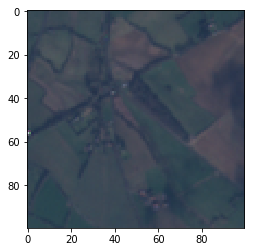

In [58]:
plt.imshow(img[:100,:100])